## Задания 1-3

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

датасет: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

In [5]:
df = pd.read_csv('supermarket.csv', sep=',')
df

FileNotFoundError: ignored

Проверить типы данных:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Привести Date и Time к типу datetime в основном датафрейме:

In [ ]:
df['Date'] = pd.to_datetime(df.Date)
df['Time'] = pd.to_datetime(df.Time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

1 задание, проверить наличие пропусков в датасете (по долям):  
    Есть ли поля с пропусками? - Нет

In [2]:
df.isnull().mean().sort_values(ascending=False)

NameError: ignored

2 задание, посмотреть общий доход в разбивке по магазинам + в динамике:

In [ ]:
df.groupby(['City'])['gross income'].sum()

City
Mandalay     5057.0320
Naypyitaw    5265.1765
Yangon       5057.1605
Name: gross income, dtype: float64

Теперь в динамике по дням:

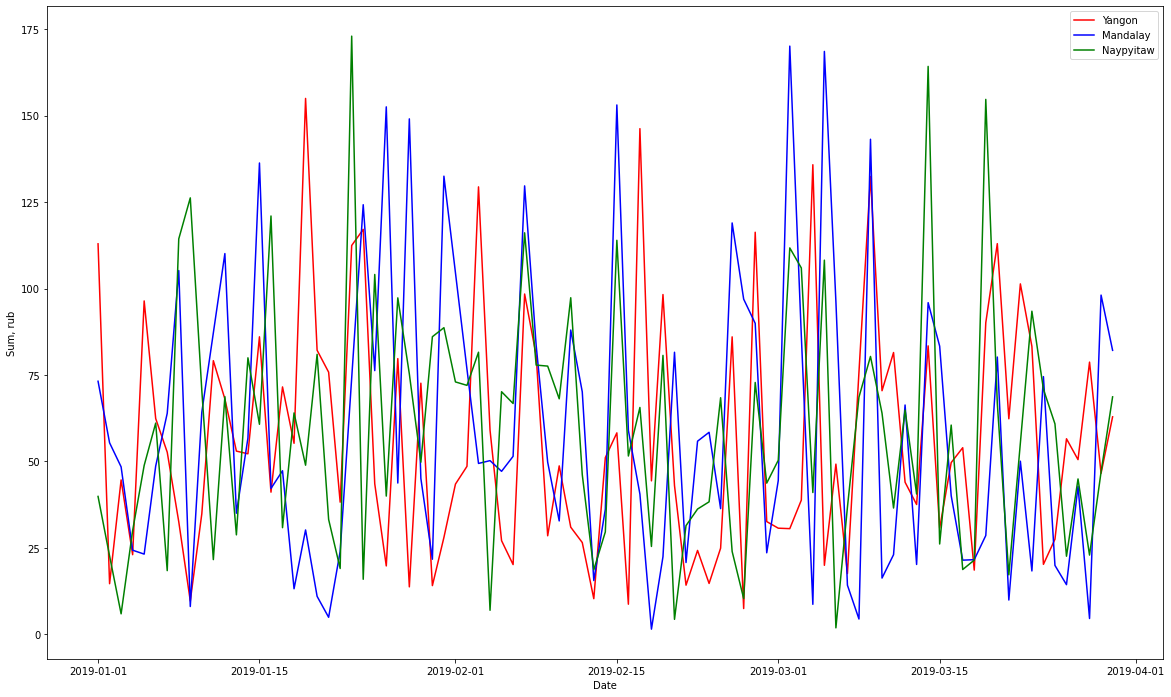

In [ ]:
plt.figure(figsize=(20,12))

d1 = df[df.City == 'Yangon'].groupby(['Date'])['gross income'].sum()
d2 = df[df.City == 'Mandalay'].groupby(['Date'])['gross income'].sum()
d3 = df[df.City == 'Naypyitaw'].groupby(['Date'])['gross income'].sum()
plt.xlabel('Date')
plt.ylabel('Sum')

plt.plot(d1.index, d1.values, linestyle='-', color='r', label='Yangon')
plt.plot(d2.index, d2.values, linestyle='-', color='b', label='Mandalay')
plt.plot(d3.index, d3.values, linestyle='-', color='g', label='Naypyitaw')

plt.legend()

Теперь добавим недели в исходный датафрейм:

In [ ]:
df['Week'] = pd.DatetimeIndex(df['Date']).week

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Week,Month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,2023-03-16 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,1,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,2023-03-16 10:29:00,Cash,76.40,4.761905,3.8200,9.6,10,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,2023-03-16 13:23:00,Credit card,324.31,4.761905,16.2155,7.4,9,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,2023-03-16 20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,4,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,2023-03-16 10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,2023-03-16 13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,5,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,2023-03-16 17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,9,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,2023-03-16 13:22:00,Cash,31.84,4.761905,1.5920,7.7,6,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,2023-03-16 15:33:00,Cash,65.82,4.761905,3.2910,4.1,8,2


И теперь построим график выручки понедельно в разбивке по городу:

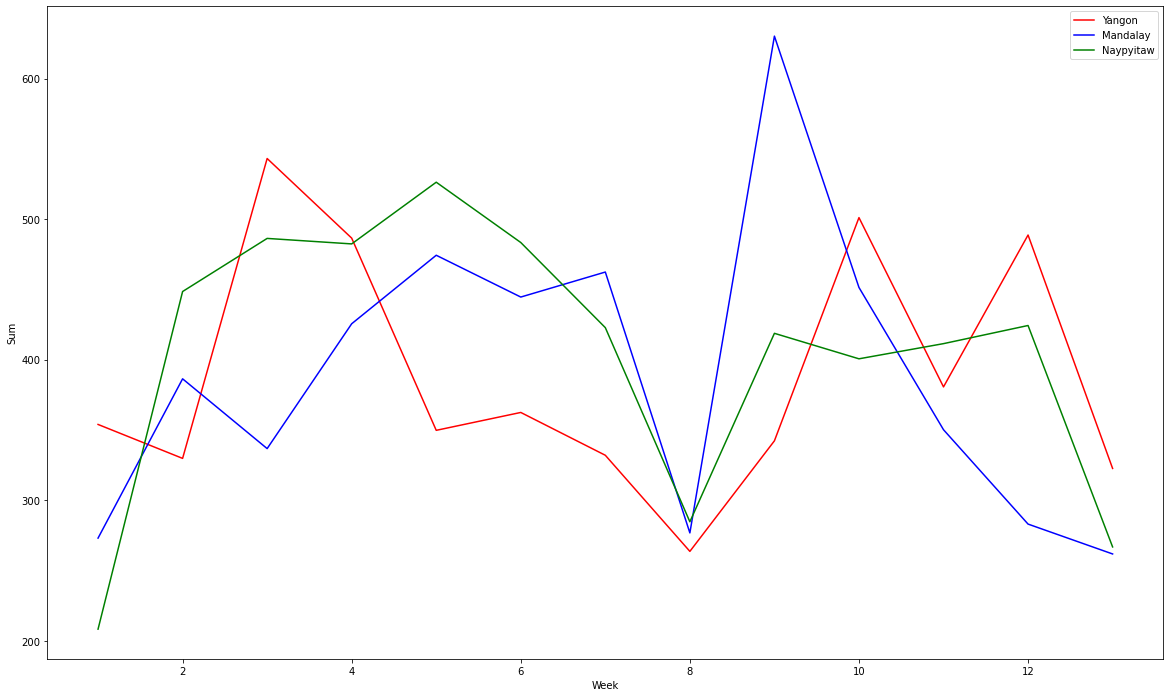

In [ ]:
plt.figure(figsize=(20,12))

d1 = df[df.City == 'Yangon'].groupby(['Week'])['gross income'].sum()
d2 = df[df.City == 'Mandalay'].groupby(['Week'])['gross income'].sum()
d3 = df[df.City == 'Naypyitaw'].groupby(['Week'])['gross income'].sum()
plt.xlabel('Week')
plt.ylabel('Sum')

plt.plot(d1.index, d1.values, linestyle='-', color='r', label='Yangon')
plt.plot(d2.index, d2.values, linestyle='-', color='b', label='Mandalay')
plt.plot(d3.index, d3.values, linestyle='-', color='g', label='Naypyitaw')

plt.legend()

Теперь посмотрим количетсво купленных продуктов по типу (здесь есть нюанс, по количетсву записей считать нельзя, так как есть колонка с количеством):       
Какого типа товара больше всего купили? - Electronic accessories

In [ ]:
df.groupby('Product line')['Quantity'].sum()

Product line
Electronic accessories    971
Fashion accessories       902
Food and beverages        952
Health and beauty         854
Home and lifestyle        911
Sports and travel         920
Name: Quantity, dtype: int64

Теперь посмотрим долю (нормализованую) покупателей членов бонусной программы и нет. Кого больше? - членов программы

In [ ]:
df['Customer type'].value_counts(normalize=True)

Member    0.501
Normal    0.499
Name: Customer type, dtype: float64

Теперь посмотрим средний чек по платежному методу:

In [ ]:
df.groupby('Payment')['Total'].mean()

Payment
Cash           326.181890
Credit card    324.009878
Ewallet        318.820600
Name: Total, dtype: float64

Теперь посмотрим в динамике по неделям:

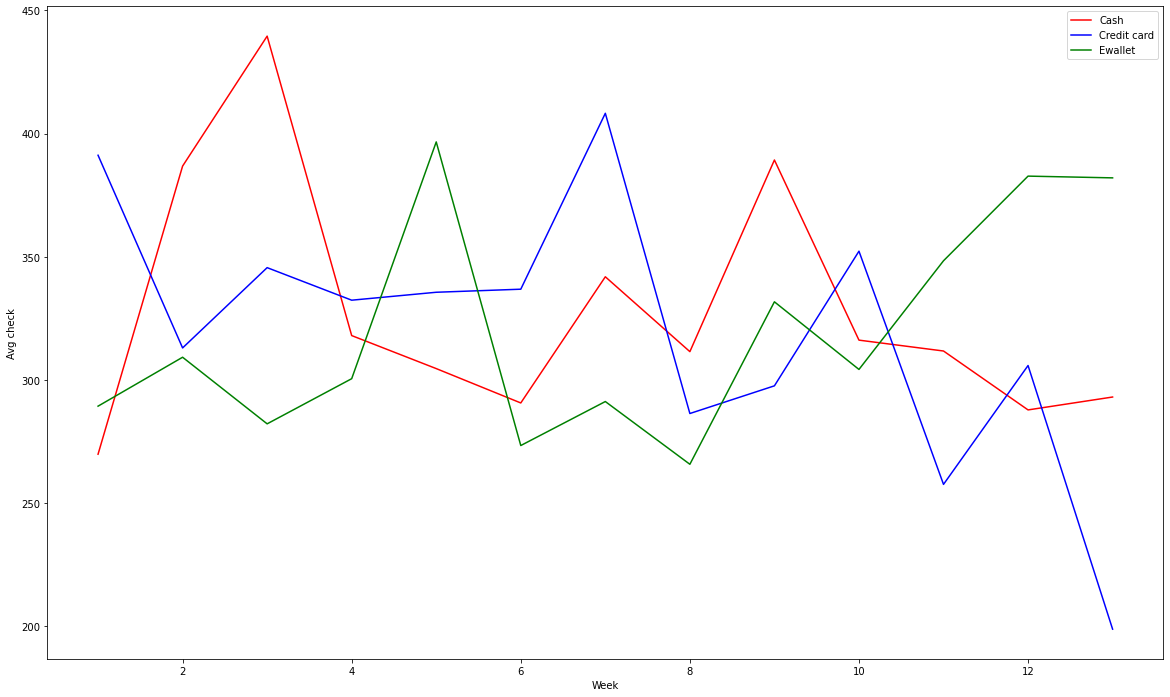

In [ ]:
plt.figure(figsize=(20,12))

a1 = df[df.Payment == 'Cash'].groupby(['Week'])['Total'].mean()
a2 = df[df.Payment == 'Credit card'].groupby(['Week'])['Total'].mean()
a3 = df[df.Payment == 'Ewallet'].groupby(['Week'])['Total'].mean()
plt.xlabel('Week')
plt.ylabel('Avg check')

plt.plot(a1.index, a1.values, linestyle='-', color='r', label='Cash')
plt.plot(a2.index, a2.values, linestyle='-', color='b', label='Credit card')
plt.plot(a3.index, a3.values, linestyle='-', color='g', label='Ewallet')

plt.legend()

## Задания 4-5

In [ ]:
#Загрузить данные Electric cars.csv
#Построить график зависимости PriceEuro от TopSpeed_KmH  с помощью функции scatter matplotlib без дополнительных параметров
#Вопросы: 1.Посчитать количество вершин описывающего многоугольника
#(выпуклый многоугольник, вершинами которого являются точки диаграммы,
#при этом все остальные вершины находятся внутри многоугольника) ver_count
# 2.Какая площадь у описывающего прямоугольника: Варианты ответа 'area':
# а.лежит в диапазоне 70000000-90000000 б. лежит в диапазоне 90000000-100000000 в. лежит в диапазоне 100000000-110000000
#Сохранить график под именем saved_figure.png

Решение задания

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('Electric Car.csv')
df

In [ ]:
fig = plt.figure()

x = df['TopSpeed_KmH']
y = df['PriceEuro']

plt.scatter(x, y)

fig.savefig('saved_figure.png')  #

ver_count = 7
area = 'a'

Задание на категоризацию данных

In [ ]:
#Загрузить данные Electric Cars.csv
#сделать категоризацию столбца BodyStyle с помощью sklearn.preprocessing  LabelEncoder
#найти сумму значений полученного столбца sum
#найти количество категорий cat_count

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=pd.read_csv('Electric_Car.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

data_labeled = df.copy()

data_labeled.loc[:, 'BodyStyle'] = labelencoder.fit_transform(data_labeled.loc[:, 'BodyStyle'])
sum = data_labeled['BodyStyle'].sum()
cat_count = data_labeled['BodyStyle'].nunique()


Проверка задания

In [ ]:
print(sum+cat_count==429)